# EDA of UCSD DSC 20 Grades (Spring 2018)
DSC 20 (Programming and Data Structures) is an awesome data science course taught at UC San Diego. DSC 20 is taught using Python and a good portion of the course is spent building off of the concepts in its prerequisite course, DSC 10 (Principles of Data Science). This includes the use of the pandas library for big data processing. Course descriptions for DSC 10 and DSC 20 are [here](https://ucsd.edu/catalog/courses/DSC.html).

At the end of the course, grade breakdowns were released via CSV files (quite suitably). We were given a dataset. So of course, I'm going to analyze it.

We'll be analyzing student grades for the quarter I took this course, Spring Quarter 2018.

## Course Syllabus
Taken from the [course syllabus](https://sites.google.com/a/eng.ucsd.edu/dsc20-spring-2018/), below is the grade breakdown used for the calculation of the final grade given at the end of the course.

>- *30% Final Exam*
- *25% Homework Assignments*
- *15% Midterm Exam*
- *15% Labs*
- *10% Final Project*
- *5% Class Participation*
>
>*You must score at least 55% on the final exam to pass the course.  If you score lower than 55% on the final, you will receive an F in the course, regardless of your overall average.*

In [1]:
final_exam_cutoff = .55

Since UCSD runs on the quarter system, the course consisted of ten weeks of instruction. A lab and a homework assignment was assigned every week, resulting in a total of 10 lab and homework assignments. A midterm exam was held during Week 5 and a final exam after Week 10.

In [2]:
weeks = range(1,11)

## Packages and Utilities

We'll import packages and set up utilities to be used down the line.

In [3]:
from itertools import combinations  # Combinations (combinatorics)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from matplotlib.lines import Line2D
from natsort import natsorted  # Natural sorting
import numpy as np

import pandas as pd
pd.set_option('display.precision', 4)
pd.set_option('max_columns', 30)
pd.set_option('max_colwidth', 100)
pd.set_option('max_rows', 8)

import re  # Regular expressions
import scipy.stats as stats
import seaborn as sns

In [4]:
%%javascript
/* Disable auto-scrolling of long cell output */
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Data Import and Processing
We'll take a look at the raw dataset, then process our dataset into the most convenient format for our analysis.

If you were wondering, my secret code is `gko011`

### Raw Dataset

In [5]:
df_raw = pd.read_csv('Grades.csv')
df_raw

,Secrete Code,ants_bees_score,hw1_score,hw10_score,hw2_score,hw3_score,hw4_score,hw5_score,hw6_score,hw7_score,hw8_score,hw9_score,lab01_score,lab02_score,lab03_score,lab04_score,lab05_score,lab07_score,lab08_score,lab09_score,lab10_score,lab6_score,Midterm,Final,Participation,LAB_Total,HW_Total,Weighted_Total
0,vkk236,1.08,0.78,0.8,0.86,0.90,0.96,0.86,1.00,1.00,0.80,0.88,1.0,1.0,1.0,1.0,1.0,0.1,1.0,1.0,1.0000,1.0,0.9250,1.0444,0.8889,1.0000,0.9075,0.9814
1,blcrqj,1.08,0.94,0.6,0.93,0.88,0.99,0.93,0.90,0.87,0.93,0.95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.0,0.8375,0.9667,1.0000,1.0000,0.9312,0.9564
2,bxc522,1.08,0.97,0.0,0.84,0.91,0.99,0.93,1.00,0.92,0.99,0.96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.0,0.9125,0.9422,1.0000,1.0000,0.9588,0.9672
3,sghvkpdq,1.00,0.99,1.0,0.68,0.86,0.84,0.88,0.96,0.96,0.41,0.83,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8571,1.0,0.9250,0.7889,0.6667,0.9841,0.9150,0.8851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,da005706,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.2222,0.0000,0.0000,0.0111
145,da005732,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0500
146,da005687,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.7778,0.0000,0.0000,0.0389
147,da005745,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.9259,0.0000,0.0000,0.0463


### Processing

In [106]:
# Sort by Weighted_Total
df = df_raw.sort_values('Weighted_Total', ascending=False).reset_index(drop=True)
df.index += 1

# Add tuples of HW and Lab scores
hw_cols = natsorted(filter(re.compile('hw\d+_score').match, df.columns))
lab_cols = natsorted(filter(re.compile('lab\d+_score').match, df.columns))
df['HW'] = df[hw_cols].apply(lambda row: tuple(row), axis=1)
df['Lab'] = df[lab_cols].apply(lambda row: tuple(row), axis=1)

# Select and rename columns
df = df[['Secrete Code','Weighted_Total','Final','Midterm','HW_Total','LAB_Total','ants_bees_score','Participation','HW','Lab']]
df.rename({'Secrete Code':'ID','Weighted_Total':'Total','HW_Total':'HW_Avg','LAB_Total':'Lab_Avg','ants_bees_score':'Project'}, axis=1, inplace=True)
df

,ID,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation,HW,Lab
1,vkb218,1.0229,1.0778,0.9750,0.9813,1.0000,1.08,1.0000,"(1.0, 0.65, 0.98, 0.99, 0.93, 0.96, 0.98, 0.96, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
2,gko011,1.0225,1.0889,0.9375,0.9888,1.0000,1.08,1.0000,"(1.0, 0.95, 0.98, 0.92, 1.0, 1.0, 0.96, 0.99, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
3,zhc195,1.0097,1.1222,0.9375,0.9295,1.0000,1.00,1.0000,"(0.82, 0.91, 0.92, 0.97, 0.96, 0.99, 0.92, 0.9259999999999999, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
4,mprxo,1.0046,1.1144,0.8875,0.9487,1.0000,1.00,1.0000,"(0.93, 0.89, 0.89, 0.97, 0.99, 1.0, 0.98, 0.86, 0.94, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...
145,golx9999,0.0207,0.0000,0.0000,0.0000,0.1111,0.04,0.0000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
146,svsdkzd,0.0167,0.0000,0.0000,0.0000,0.1111,0.00,0.0000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
147,blk317,0.0167,0.0000,0.0000,0.0000,0.1111,0.00,0.0000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
148,da005706,0.0111,0.0000,0.0000,0.0000,0.0000,0.00,0.2222,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


In [114]:
highlight = lambda row: ['background: lightyellow' if row.name == 120 
                         else 'background: seashell' if row.name > 123
                         else 'background: honeydew' for i in row]
df.loc[118:126].style.apply(highlight, axis=1)

,ID,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation,HW,Lab
118,jvfkzduw,0.657,0.5678,0.9,0.4088,0.7,1,0.8889,"(0.71, 0.09, 0.61, 0.29, 0.54, 0.89, 0.14, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 1.0, 0.7, 1.0, 1.0, 0.6, 0.0, 1.0)"
119,b2pd,0.6455,0.4822,0.6125,0.65,0.9722,0.58,0.8519,"(0.65, 0.38, 0.86, 0.8, 0.0, 0.86, 0.96, 0.0, 0.69, 0.0)","(1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5714285714285714)"
120,qlo021,0.6308,0,0.975,0.8494,1,1,0.4444,"(0.815, 0.53, 0.87, 0.97, 0.92, 0.92, 0.38, 0.93, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
121,h3vdqwrv,0.6228,0.3244,0.4875,0.6825,0.8905,1,0.963,"(0.89, 0.5, 0.73, 0.73, 0.52, 0.67, 0.9, 0.16, 0.52, 0.0)","(1.0, 1.0, 1.0, 1.0, 0.7, 1.0, 1.0, 0.6, 0.3, 0.7142857142857143)"
122,clt016,0.6132,0.3033,0.7375,0.6475,0.9194,0.84,0.5556,"(0.62, 0.43, 0.69, 0.78, 0.79, 0.93, 0.24, 0.0, 0.7, 0.0)","(0.4, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0)"
123,uxihl,0.5687,0.2667,0.2625,0.7375,0.8778,1,0.6667,"(0.85, 0.1664, 0.73, 0.7, 0.89, 0.95, 0.22, 0.63, 0.93, 0.0)","(0.4, 1.0, 0.5, 1.0, 0.7, 1.0, 0.7, 1.0, 1.0, 1.0)"
124,phw016,0.3391,0,0.6125,0.4888,0.8333,0,0,"(0.83, 0.43, 0.17, 0.9, 0.71, 0.0, 0.39, 0.48, 0.0, 0.0)","(1.0, 1.0, 1.0, 0.2, 0.4, 1.0, 1.0, 1.0, 0.9, 0.0)"
125,bzfkhq,0.2712,0,0.5875,0.4475,0.475,0,0,"(0.87, 0.38, 0.74, 0.89, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 1.0, 0.875, 1.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0)"
126,vwdnhjdp,0.1932,0,0.3875,0.3719,0.1199,0,0.4815,"(0.775, 0.48, 0.81, 0.91, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.4, 0.4545454545454545, 0.125, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


Let's assume:

$$\text{A student has taken the final exam and received a nonzero score.} \implies \text{The student has not dropped the course.}$$

However, the converse is not necessarily true. There is a chance an enrolled student unintentionally missed the final exam due to oversleeping or an emergency. Students drop at different times.

In [21]:
# Remove students who dropped
df = df.iloc[:df.shape[0] - tuple(df['Final'] > 0)[::-1].index(True)]
n = df.shape[0]
df

,ID,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation,HW,Lab
1,vkb218,1.0229,1.0778,0.9750,0.9813,1.0000,1.08,1.0000,"(1.0, 0.65, 0.98, 0.99, 0.93, 0.96, 0.98, 0.96, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
2,gko011,1.0225,1.0889,0.9375,0.9888,1.0000,1.08,1.0000,"(1.0, 0.95, 0.98, 0.92, 1.0, 1.0, 0.96, 0.99, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
3,zhc195,1.0097,1.1222,0.9375,0.9295,1.0000,1.00,1.0000,"(0.82, 0.91, 0.92, 0.97, 0.96, 0.99, 0.92, 0.9259999999999999, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
4,mprxo,1.0046,1.1144,0.8875,0.9487,1.0000,1.00,1.0000,"(0.93, 0.89, 0.89, 0.97, 0.99, 1.0, 0.98, 0.86, 0.94, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...
120,qlo021,0.6308,0.0000,0.9750,0.8494,1.0000,1.00,0.4444,"(0.815, 0.53, 0.87, 0.97, 0.92, 0.92, 0.38, 0.93, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
121,h3vdqwrv,0.6228,0.3244,0.4875,0.6825,0.8905,1.00,0.9630,"(0.89, 0.5, 0.73, 0.73, 0.52, 0.67, 0.9, 0.16, 0.52, 0.0)","(1.0, 1.0, 1.0, 1.0, 0.7, 1.0, 1.0, 0.6, 0.3, 0.7142857142857143)"
122,clt016,0.6132,0.3033,0.7375,0.6475,0.9194,0.84,0.5556,"(0.62, 0.43, 0.69, 0.78, 0.79, 0.93, 0.24, 0.0, 0.7, 0.0)","(0.4, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0)"
123,uxihl,0.5687,0.2667,0.2625,0.7375,0.8778,1.00,0.6667,"(0.85, 0.1664, 0.73, 0.7, 0.89, 0.95, 0.22, 0.63, 0.93, 0.0)","(0.4, 1.0, 0.5, 1.0, 0.7, 1.0, 0.7, 1.0, 1.0, 1.0)"


## EDA

In [8]:
df.describe()

,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation
count,123.0000,123.0000,123.0000,123.0000,123.0000,123.0000,123.0000
mean,0.8523,0.7751,0.7660,0.8588,0.9786,1.0091,0.8485
std,0.0994,0.1983,0.1647,0.1109,0.0475,0.1365,0.2497
min,0.5687,0.0000,0.0000,0.4006,0.7000,0.3000,0.0000
25%,0.7954,0.6633,0.6750,0.8062,0.9841,1.0000,0.7963
50%,0.8604,0.7889,0.8000,0.8975,1.0000,1.0800,0.9630
75%,0.9333,0.9183,0.8875,0.9350,1.0000,1.0800,1.0000
max,1.0229,1.1222,0.9750,0.9925,1.0000,1.0800,1.0000


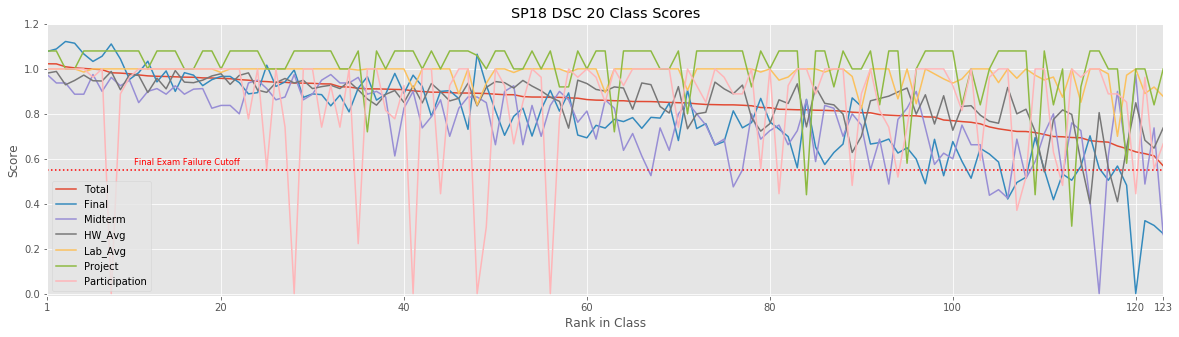

In [9]:
df.plot(figsize=(20,5))
plt.title('SP18 DSC 20 Class Scores')
plt.xlabel('Rank in Class')
plt.ylabel('Score')
plt.axhline(final_exam_cutoff, c='r', ls=':', lw=1.5)
plt.text(10.5, .575, 'Final Exam Failure Cutoff', color='r', size='small')
plt.axis([1,n,-.01,1.2])
plt.xticks(list(range(20,n,20)) + [1,n]);

In [10]:
# confidentiality

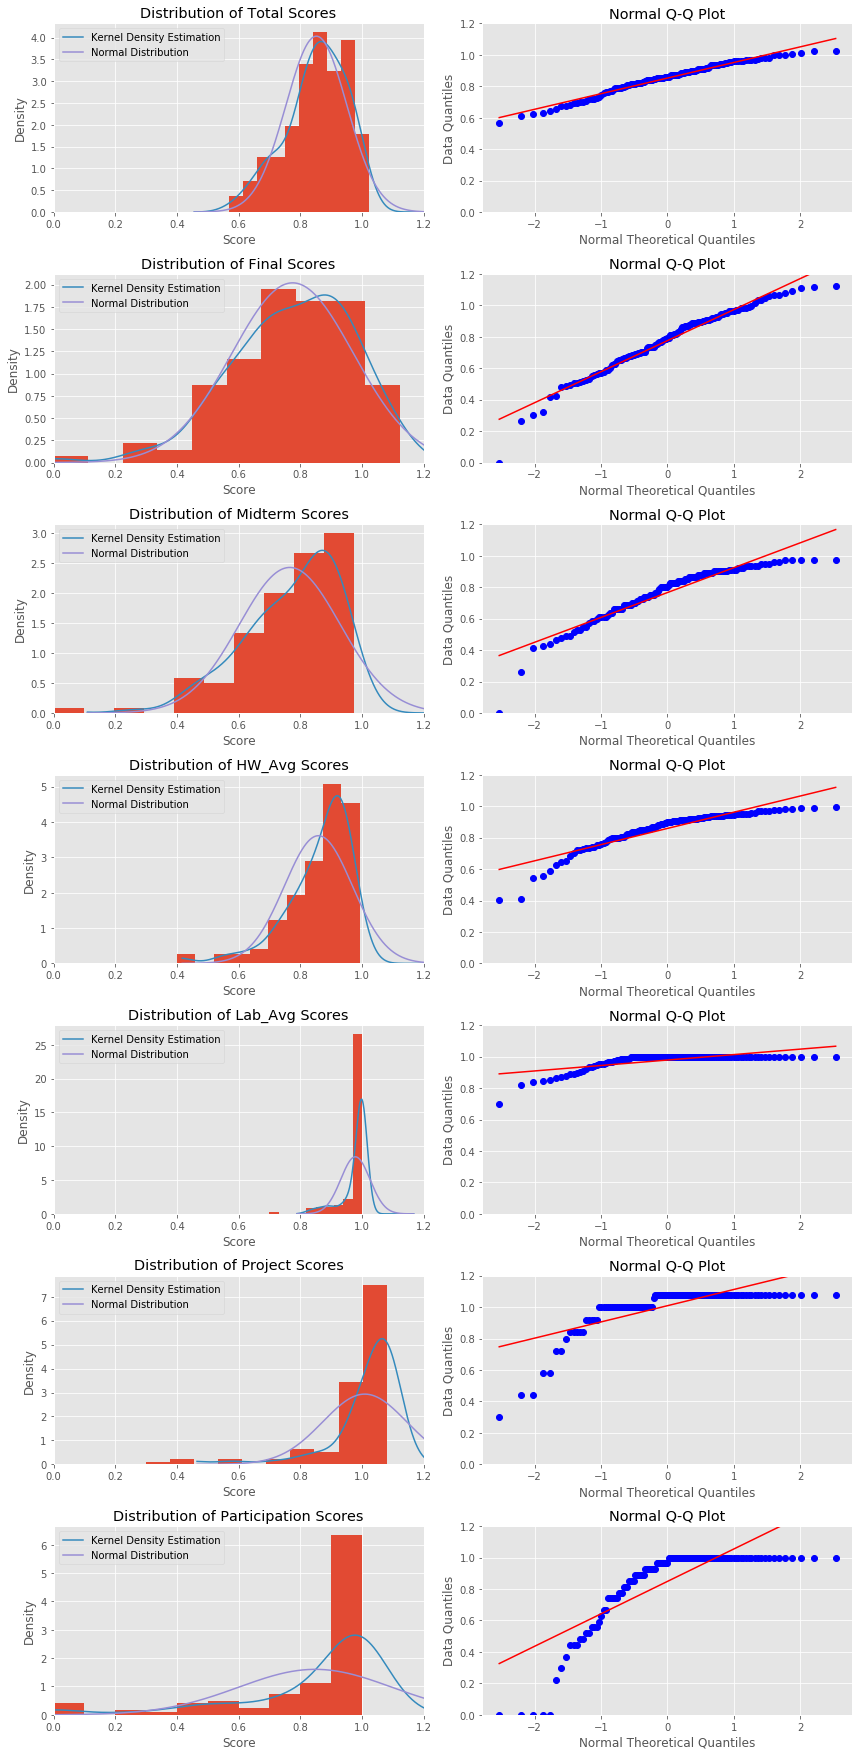

In [11]:
criteria = 'Total','Final','Midterm','HW_Avg','Lab_Avg','Project','Participation'
nrows = len(criteria)

plt.figure(figsize=(12,3.5*nrows))

for i, criterion in enumerate(criteria, 1):
    data = df[criterion]
    mean, sd = np.mean(data), np.std(data)
    
    # Histogram
    plt.subplot(nrows, 2, 2*i-1)
    data.hist(density=True)
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)
    plt.plot(x, stats.gaussian_kde(data)(x), label='Kernel Density Estimation')
    plt.plot(x, stats.norm.pdf(x, loc=mean, scale=sd), label='Normal Distribution')
    plt.title('Distribution of {} Scores'.format(criterion))
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.xlim(0, 1.2)
    plt.legend(loc='upper left')

    # Q-Q Plot
    plt.subplot(nrows, 2, 2*i)
    stats.probplot(data, plot=plt)
    plt.title('Normal Q-Q Plot')
    plt.xlabel('Normal Theoretical Quantiles')
    plt.ylabel('Data Quantiles')
    plt.ylim([0,1.2])
    
plt.tight_layout()

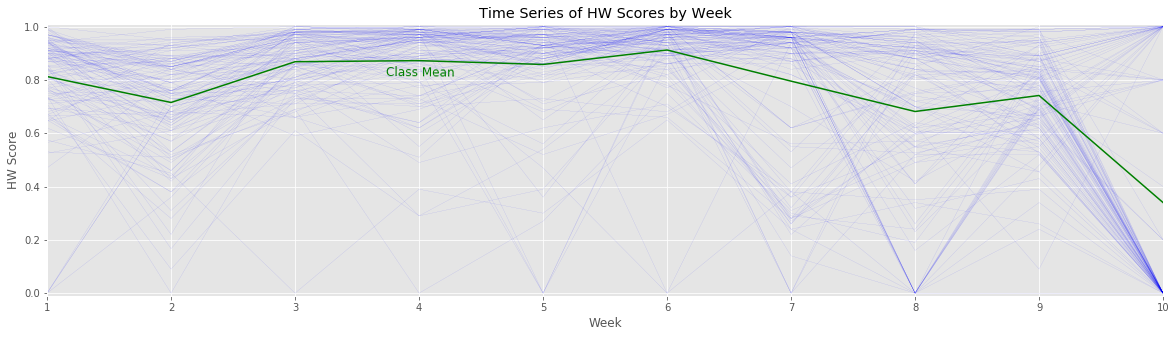

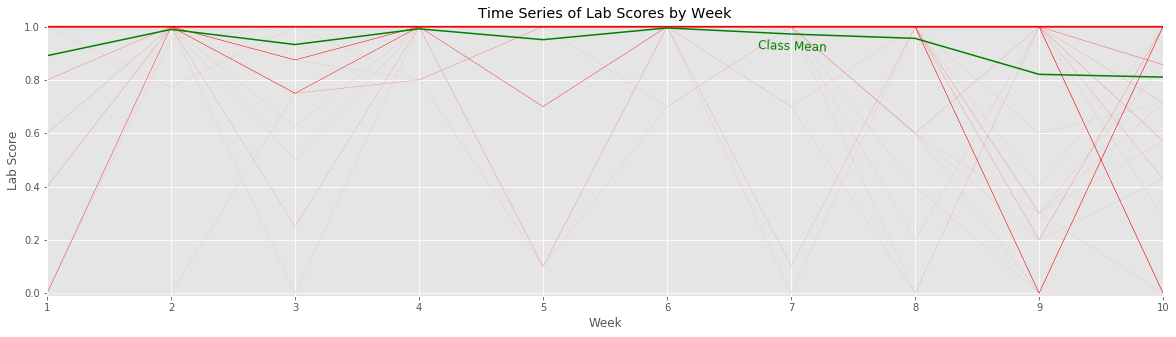

In [12]:
assignment_axes = [1,10,-.01,1.01]

hw_mean, lab_mean = tuple(map(np.mean, zip(*df['HW']))), tuple(map(np.mean, zip(*df['Lab'])))

texts = []
for assignment, color, mean in ('HW','b',hw_mean), ('Lab','r',lab_mean):
    plt.figure(figsize=(20,5))
    
    # All scores
    for row in range(n):
        plt.plot(weeks, df.iloc[row][assignment], color, lw=.05)
        
    # Averages (and associated labels)
    plt.plot(weeks, mean, 'g')
    texts.append(plt.text(0, 0, 'Class Mean', color='g', size='large'))
    
    plt.title('Time Series of {} Scores by Week'.format(assignment))
    plt.xlabel('Week')
    plt.ylabel('{} Score'.format(assignment))
    plt.axis([1,10,-.01,1.01])
    plt.xticks(weeks)
        
plt.setp(texts[0], x=3.73, y=.815, rotation=-.5)
plt.setp(texts[1], x=6.73, y=.918, rotation=-2);
#explain drops in scores, drops, non graded

In [13]:
hw_correlations = {}
for a, b in combinations(range(n), 2):
    hw_correlations[a, b] = stats.pearsonr(df.iloc[a]['HW'], df.iloc[b]['HW'])[0]
pairs = len(hw_correlations)
print('There are {} combinations of student pairings from the class of {} students.'.format(pairs, n))

There are 7503 combinations of student pairings from the class of 123 students.


Proof: $\binom{123}{2}=\frac{123!}{2!(123-2)!}=7503$.

In [14]:
df_hw = pd.DataFrame(list(hw_correlations.items()), columns=['Pairing','r'])
df_hw['HW']      = df_hw['Pairing'].apply(lambda pair: (df.iloc[pair[0]]['HW'], df.iloc[pair[1]]['HW']))
df_hw['Pairing'] = df_hw['Pairing'].apply(lambda pair: (df.iloc[pair[0]]['ID'], df.iloc[pair[1]]['ID']))
df_hw = df_hw[['r','Pairing','HW']].sort_values('r',ascending=False).reset_index(drop=True)
df_hw.index += 1
df_hw

,r,Pairing,HW
1,0.9970,"(alc643, vlg015)","((0.97, 0.85, 0.94, 0.96, 0.96, 0.9, 0.96, 0.88, 0.81, 0.0), (0.97, 0.87, 0.99, 0.97, 0.97, 0.97..."
2,0.9960,"(cepdvrrg, h4gldc)","((0.81, 0.88, 0.9, 0.99, 0.94, 0.97, 1.0, 1.0, 0.755, 0.0), (0.83, 0.93, 0.92, 0.99, 0.98, 1.0, ..."
3,0.9943,"(fdr.fkhqcl97, bxc530)","((0.92, 0.79, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 0.92, 1.0), (0.9, 0.7, 0.99, 1.0, 0.99, 0.98, 1.0, ..."
4,0.9941,"(da005732, da005756)","((0.0, 0.7, 0.81, 0.97, 0.99, 1.0, 0.98, 0.94, 0.81, 1.0), (0.0, 0.7, 0.81, 0.98, 0.96, 0.91, 0...."
...,...,...,...
7500,-0.6799,"(gko011, lvuxelr)","((1.0, 0.95, 0.98, 0.92, 1.0, 1.0, 0.96, 0.99, 0.98, 1.0), (0.565, 0.68, 0.66, 0.84, 0.47, 0.0, ..."
7501,-0.7348,"(odpffduw, odc021)","((0.855, 0.87, 0.8, 0.97, 0.93, 0.89, 0.94, 0.94, 0.94, 1.0), (0.95, 0.51, 0.69, 0.0, 0.27, 0.75..."
7502,-0.7649,"(vjp002, lvuxelr)","((0.88, 0.76, 0.86, 0.9, 0.9, 1.0, 0.95, 0.97, 0.87, 1.0), (0.565, 0.68, 0.66, 0.84, 0.47, 0.0, ..."
7503,-0.8393,"(odpffduw, fueurgb)","((0.855, 0.87, 0.8, 0.97, 0.93, 0.89, 0.94, 0.94, 0.94, 1.0), (0.76, 0.65, 0.79, 0.49, 0.62, 0.7..."


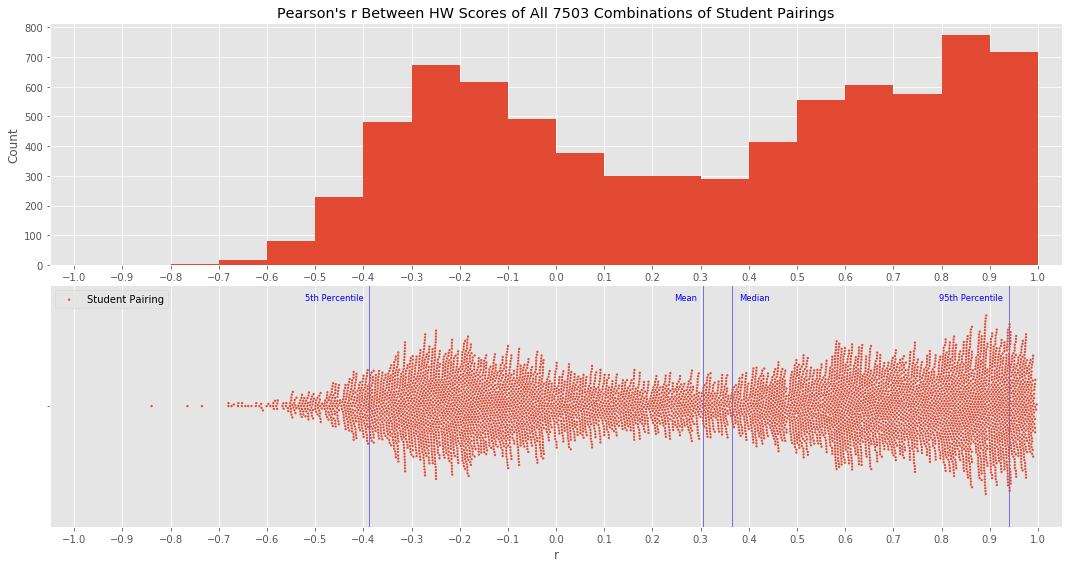

In [15]:
plt.figure(figsize=(15,8))
r = df_hw['r']
rrange = [-1.05,1.05]
rticks = np.arange(-1,1.1,.1)

plt.subplot(211)
plt.title("Pearson's r Between HW Scores of All {} Combinations of Student Pairings".format(pairs))
plt.hist(r, bins=rticks)
plt.ylabel('Count')
plt.xlim(rrange)
plt.xticks(rticks)

plt.subplot(212)
plt.xlabel("Pearson's r Between HW Scores of a Student Pairing")
sns.swarmplot(r, size=2.3, label='Student Pairing')
plt.xlim(rrange)
plt.xticks(rticks)
plt.legend()

measures = (
    ('Mean',  np.mean(r), .245),
    ('Median', np.median(r), .38),
    ('5th Percentile', np.percentile(r,5), -.52),
    ('95th Percentile', np.percentile(r,95), .795)
)

for measure in measures:
    plt.axvline(measure[1], c='b', lw=.5)
    plt.text(measure[2], -.44, measure[0], color='b', size='small')

plt.tight_layout(h_pad=0)

In [16]:
r_pos  = df_hw[:12], 'Strongest Positive', 'g', 1.02
r_avg  = df_hw.assign(ab=abs(r-np.mean(r))).sort_values('ab').drop('ab',axis=1)[:3], 'Most Typical', 'b', 1.08
r_weak = df_hw.assign(ab=abs(r)).sort_values('ab').drop('ab',axis=1)[:3], 'Weakest', 'y', 1.08
r_neg  = df_hw[::-1][:3], 'Strongest Negative', 'r', 1.08

for pairs, title, color, y in r_pos, r_avg, r_weak, r_neg:
    n_pairs = pairs.shape[0]
    plt.figure(figsize=(15,n_pairs))
    plt.suptitle("{} {} Correlations Between a Pairings' HW Scores".format(n_pairs, title), color=color, size=16, y=y)
    for pairing in range(n_pairs):
        pair = pairs.iloc[pairing]
        plt.subplot(nsubplots/3,3,pairing+1)
        plt.plot(weeks, pair['HW'][0], lw=1, label=pair['Pairing'][0])
        plt.plot(weeks, pair['HW'][1], lw=1, label=pair['Pairing'][1])
        plt.plot(weeks, hw_mean, 'g', lw=.2, label='Class Mean')

        plt.title('r = {} (#{})'.format(round(pair['r'],4), pair.name))
        plt.xlabel('Week')
        plt.ylabel('HW Score')
        plt.axis([1,10,-.01,1.02])
        plt.xticks(weeks)
        plt.legend(loc='lower left')   
    plt.tight_layout()

NameError: name 'nsubplots' is not defined

<Figure size 1080x864 with 0 Axes>

In [ ]:
# predict final